# Processing and Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-07-18 20:58:28.152149


In [2]:
df = pd.read_csv("heart_failure_clinical_records.csv")

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.00,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.00,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.00,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df = shuffle(df)

## Train - Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[["ejection_fraction","serum_creatinine","serum_sodium","time","platelets","diabetes","sex","anaemia","creatinine_phosphokinase","smoking","age","high_blood_pressure"]]
y = df[["DEATH_EVENT"]]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 4)


In [8]:
X_train

,ejection_fraction,serum_creatinine,serum_sodium,time,platelets,diabetes,sex,anaemia,creatinine_phosphokinase,smoking,age,high_blood_pressure
2143,38,1.90,135,35,310000.0,1,1,0,582,1,50.0,0
3513,38,3.00,142,30,302000.0,1,0,0,235,0,60.0,0
3986,45,0.80,136,80,249000.0,1,1,0,66,1,70.0,0
2301,25,1.83,135,67,497000.0,1,1,0,113,0,65.0,0
3681,25,1.20,137,85,318000.0,1,0,1,156,0,60.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,55,1.00,132,250,543000.0,1,0,0,582,0,45.0,0
3344,38,1.20,133,245,215000.0,0,0,0,213,0,67.0,0
3051,50,1.30,137,72,149000.0,1,1,0,224,1,65.0,0
1458,20,1.60,135,180,126000.0,0,1,0,582,0,45.0,1


In [9]:
y_train

,DEATH_EVENT
2143,1
3513,1
3986,0
2301,1
3681,0
...,...
4995,0
3344,0
3051,0
1458,1


### Sythethic Minority Oversampling Technique (SMOTE)

In [55]:
df["DEATH_EVENT"].value_counts()

0    3432
1    1568
Name: DEATH_EVENT, dtype: int64

In [63]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 2)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train.values.ravel())
X_train_balanced.shape

(4148, 12)

In [107]:
np.unique(y_train_balanced, return_counts = True)

(array([0, 1], dtype=int64), array([2074, 2074], dtype=int64))

# Regression

## Linear Regression

In [108]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(X_train_balanced, y_train_balanced)

LinearRegression()

In [109]:
y_linearRegressionP = linearRegression.predict(X_test)
print(linearRegression.score(X_test,y_test))

0.35768276430782275


In [110]:
mse = mean_squared_error(y_test, y_linearRegressionP)
print(f"MSE: {mse}")

mae = mean_absolute_error(y_test, y_linearRegressionP)
print(f"MAE: {mae}")
                          
r2 = r2_score(y_test, y_linearRegressionP)
print(f"R2: {r2}")

MSE: 0.1399988223742313
MAE: 0.30712525847449673
R2: 0.35768276430782275


## K Nearest Neighbours Regressor (KNN)

    

In [111]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(X_train_balanced, y_train_balanced)



KNeighborsRegressor()

In [112]:
y_KNN = KNN.predict(X_test)
print(KNN.score(X_test,y_test))

0.757936125601604


In [113]:
mse = mean_squared_error(y_test, y_KNN)
print(f"MSE: {mse}")

mae = mean_absolute_error(y_test, y_KNN)
print(f"MAE: {mae}")
                          
r2 = r2_score(y_test, y_KNN)
print(f"R2: {r2}")

MSE: 0.05276000000000001
MAE: 0.0676
R2: 0.757936125601604


## Decision Tree Regressor

In [114]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(random_state = 0)

DTR.fit(X_train_balanced, y_train_balanced)

DecisionTreeRegressor(random_state=0)

In [115]:
y_DTR = DTR.predict(X_test)
print(DTR.score(X_test,y_test))

0.899334405910184


In [116]:
mse = mean_squared_error(y_test, y_DTR)
print(f"MSE: {mse}")

mae = mean_absolute_error(y_test, y_DTR)
print(f"MAE: {mae}")
                          
r2 = r2_score(y_test, y_DTR)
print(f"R2: {r2}")

MSE: 0.021940972222222226
MAE: 0.022208333333333333
R2: 0.899334405910184


# Classification

## KNN Classifier

In [94]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve, PrecisionRecallDisplay, classification_report

In [95]:
from sklearn.neighbors import KNeighborsClassifier
KNNC = KNeighborsClassifier()
KNNC.fit(X_train_balanced, y_train_balanced)


KNeighborsClassifier()

In [96]:
print(KNNC.score(X_test, y_test))

0.938


In [97]:
YKNNC = KNNC.predict(X_test)

In [98]:
accuracy = accuracy_score(y_test,YKNNC)
print(f"Accuracy : {accuracy}")

precision = precision_score(y_test, YKNNC)
print(f"Precision Score : {precision}")

recall = recall_score(y_test, YKNNC)
print(f"Recall Score : {recall}")

confusion_m = confusion_matrix(y_test, YKNNC)

roc_auc = roc_auc_score(y_test, YKNNC)

print(f"ROC AUC Score : {roc_auc}")

prc = precision_recall_curve(y_test, YKNNC)
print(f"Precision Recall Curve : {prc}")

precision, recall, thresholds = precision_recall_curve(y_test, YKNNC)
auc_precision_recall = auc(recall, precision)
print(f"Precision Recall AUC : {auc_precision_recall}")




Accuracy : 0.938
Precision Score : 0.8948170731707317
Recall Score : 0.9143302180685359
ROC AUC Score : 0.9317601016704976
Precision Recall Curve : (array([0.321     , 0.89481707, 1.        ]), array([1.        , 0.91433022, 0.        ]), array([0, 1], dtype=int64))
Precision Recall AUC : 0.9183236456196338


In [99]:
print(classification_report(y_test, YKNNC))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1358
           1       0.89      0.91      0.90       642

    accuracy                           0.94      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000



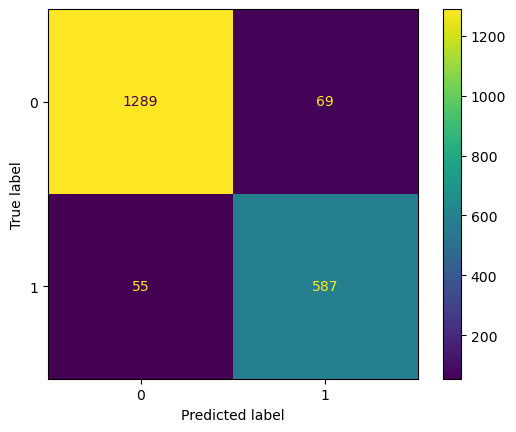

In [100]:
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m)
cmd.plot()
plt.show()

In the Confusion Matrix, the Columns correspond to the predictions made by the ml model, whereas the Rows represent the actual values of the test dataset or known truth.

In our case there are two categories to choose from which is death_event is false or death_event is true.

The top left contains the true negatives, these are patients that have mortality that were correctly predicted by the algorithm.

The true postives are on the bottom right, these are the patients that are survivors that were correctly predicted by the algorithm. 

However the bottom left is false negatives, where the patient does have mortality, but the ml predictions state they dont.

The top right is false postives where the patient does not mortality but the ml algorithm states that they have.




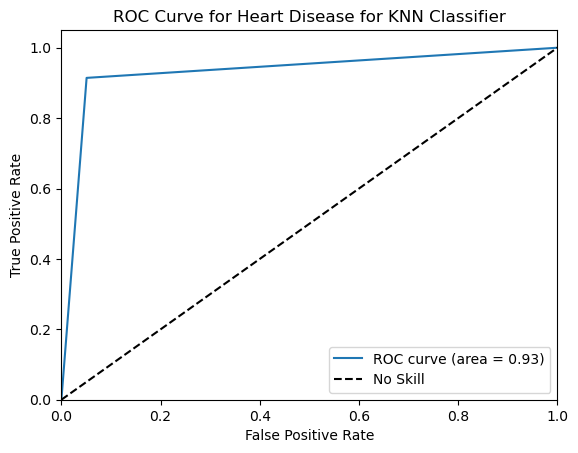

In [101]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, YKNNC) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease for KNN Classifier')
plt.legend()
plt.show()

Reciever Operator Characteristc ROC graphs provides a way to summurize all the information.

Y axis shows the true postive rate, which is the same as sensitvity. The X axis shows the false positive rate same thing as specitivity.

The true postive rate tells you the proportion of the true samples were correctly classified, i.e the proportion of mortality patients that were correctly classified.

The false postive rate tells you the proportion of the false samples were incorrectly classified, for instance the proportion of survivors that were incorrectly classified as mortality.

The no skill line shows where the True postive rate = False postive rate. Therefore it means that at any point on this line means that the proportion of correctly identified postives is the same as the proportion of the incorrectly classifed postives.

ROC Graph summarizes all of the confusion matrices that each classification threshold produced. From the ROC graph we can determine what threshold or cut off value is the best for each ml model for making a decision.

Area Under the Curve or AUC makes it easier to compare one ROC curve to another. If the AUC for model A is greater then the AUC for model B, we can state that model A is better then model B.

ROC curves make it easy to determine the best threshold for making a decision. Classifiers that give curves closer to the top-left corner indicate a better performance as they are better able to have a greater proportion of true postives compared to false postives. i.e if there is a point of (x = 10,y =100) we can infer that for 10 false postives the model will have 100 true postives, i.e 10:100.






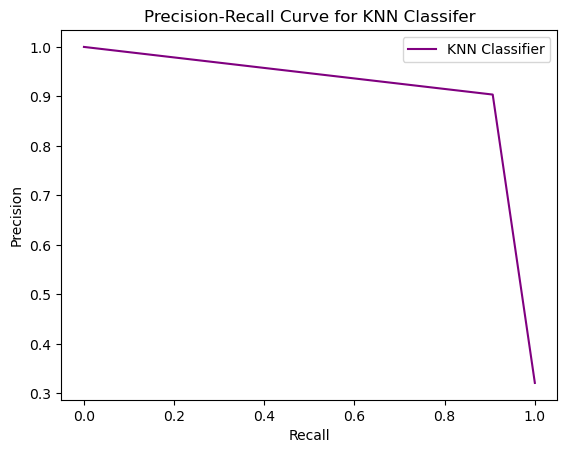

In [26]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, YKNNC)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple', label = "KNN Classifier")



#add axis labels to plot
ax.set_title('Precision-Recall Curve for KNN Classifer')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.legend()
plt.show()

ROC and AUC has its limitations when we deal with inbalanced datasets, where the balance between postives and negatives are not 50:50. 

Precision is how many instances of the predicted postive datapoints are actually positve. The Precision is not influcened by the number of negative datapoints, therefore its preferred with inbalanced datasets. Each point in the precsion graph is a threshold in which the precision and recall is calculated.

Recall is in the x axis in the precision recall graph.

Precision measures the percentage of correct predictions, while recall measures the percentage of relevant data points that were correctly identified. 

Precision
The number of true positives divided by the number of true positives plus the number of false positives

Recall
The number of true positives divided by the number of true positives plus the number of false negatives



## Decision Tree Classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier()

In [88]:
YDTC = DTC.predict(X_test)


In [89]:
accuracy = accuracy_score(y_test,YDTC)
print(f"Accuracy : {accuracy}")

precision = precision_score(y_test, YDTC)
print(f"Precision Score : {precision}")

recall = recall_score(y_test, YDTC)
print(f"Recall Score : {recall}")

confusion_m = confusion_matrix(y_test, YDTC)

roc_auc = roc_auc_score(y_test, YDTC)
print(f"ROC AUC Score : {roc_auc}")

prc = precision_recall_curve(y_test, YDTC)
print(f"Precision Recall Curve : {prc}")

Accuracy : 0.98
Precision Score : 0.9747634069400631
Recall Score : 0.9626168224299065
ROC AUC Score : 0.9754173950146587
Precision Recall Curve : (array([0.321     , 0.97476341, 1.        ]), array([1.        , 0.96261682, 0.        ]), array([0, 1], dtype=int64))


In [90]:
print(classification_report(y_test, YDTC))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1358
           1       0.97      0.96      0.97       642

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



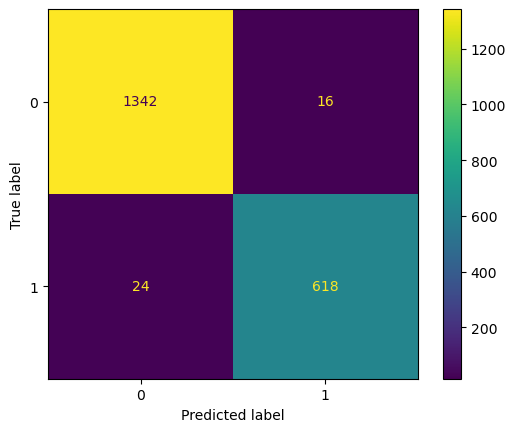

In [91]:
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m)
cmd.plot()
plt.show()

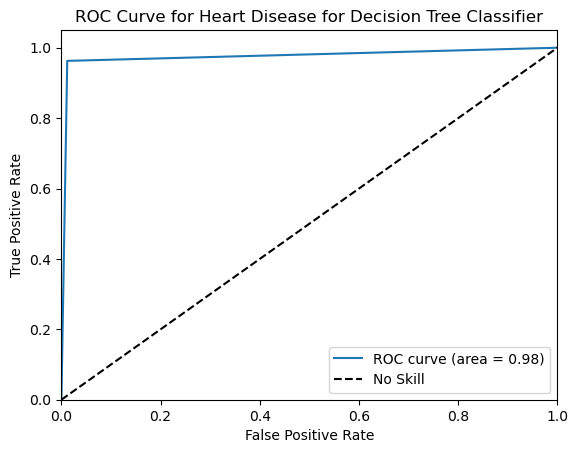

In [92]:
fpr, tpr, thresholds = roc_curve(y_test, YDTC) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease for Decision Tree Classifier')
plt.legend()
plt.show()

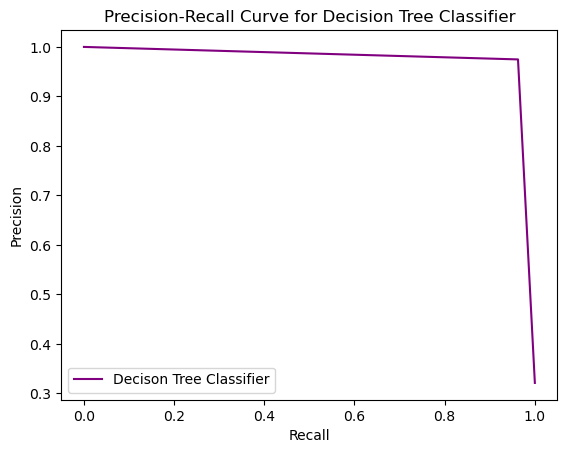

In [93]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, YDTC)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple', label = "Decison Tree Classifier")

#add axis labels to plot
ax.set_title('Precision-Recall Curve for Decision Tree Classifier')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.legend()
plt.show()

##  Gaussian Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

In [79]:
GNB = GaussianNB()
GNB.fit(X_train_balanced, y_train_balanced)

GaussianNB()

In [80]:
YGNB = GNB.predict(X_test)

In [81]:
accuracy = accuracy_score(y_test,YGNB)
print(f"Accuracy : {accuracy}")

precision = precision_score(y_test, YGNB)
print(f"Precision Score : {precision}")

recall = recall_score(y_test, YGNB)
print(f"Recall Score : {recall}")

confusion_m = confusion_matrix(y_test, YGNB)

roc_auc = roc_auc_score(y_test, YGNB)
print(f"ROC AUC Score: {roc_auc}")

Accuracy : 0.8425
Precision Score : 0.7429420505200595
Recall Score : 0.778816199376947
ROC AUC Score: 0.8257114870227886


In [82]:
print(classification_report(y_test,YGNB))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1358
           1       0.74      0.78      0.76       642

    accuracy                           0.84      2000
   macro avg       0.82      0.83      0.82      2000
weighted avg       0.84      0.84      0.84      2000



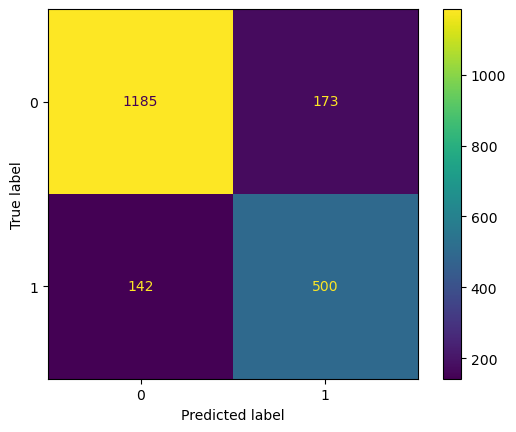

In [83]:
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m)
cmd.plot()
plt.show()

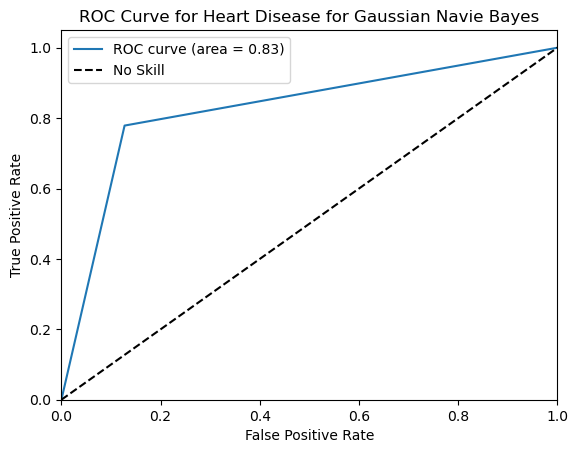

In [84]:
fpr, tpr, thresholds = roc_curve(y_test, YGNB) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease for Gaussian Navie Bayes')
plt.legend()
plt.show()

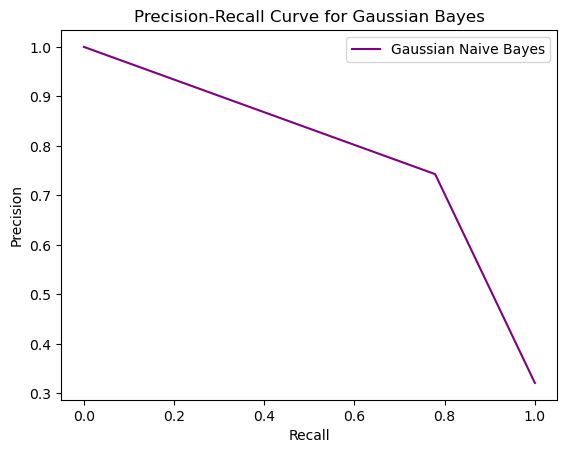

In [85]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, YGNB)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple', label = "Gaussian Naive Bayes")

#add axis labels to plot
ax.set_title('Precision-Recall Curve for Gaussian Bayes')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.legend()
plt.show()

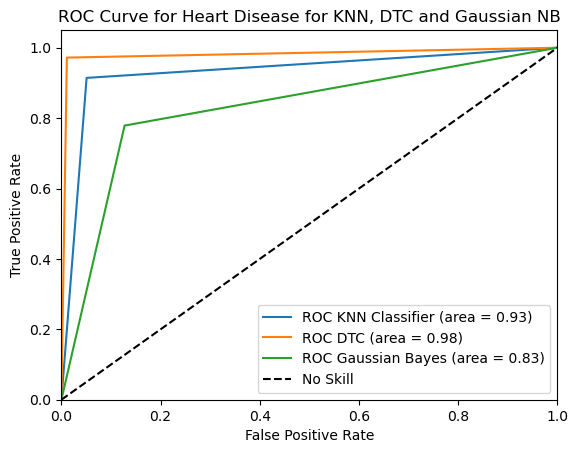

In [86]:
fpr, tpr, thresholds = roc_curve(y_test, YKNNC) 
fpr2, tpr2, thresholds = roc_curve(y_test, YDTC) 
fpr3, tpr3, thresholds = roc_curve(y_test, YGNB) 
roc_auc = auc(fpr, tpr)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC KNN Classifier (area = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, label='ROC DTC (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='ROC Gaussian Bayes (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease for KNN, DTC and Gaussian NB')
plt.legend()
plt.show()

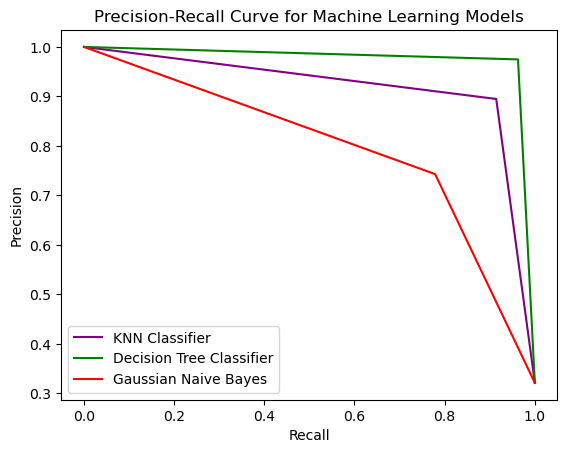

In [120]:
#calculate precision and recall
precision1, recall1, thresholds1 = precision_recall_curve(y_test, YKNNC)
precision2, recall2, thresholds2 = precision_recall_curve(y_test, YDTC)
precision3, recall3,thresholds3 = precision_recall_curve(y_test, YGNB)


#create precision recall curve
fig, ax = plt.subplots()
plt.plot(recall1, precision1, color='purple', label = "KNN Classifier")
plt.plot(recall2, precision2, color='green', label = "Decision Tree Classifier")
plt.plot(recall3, precision3, color='red', label = "Gaussian Naive Bayes")

#add axis labels to plot
ax.set_title('Precision-Recall Curve for Machine Learning Models')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.legend()
plt.show()

# Artifical Neural Networks

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.optimizers import SGD

## Single Layer Perceptron

In [117]:
virginModel = Sequential([
Dense(10, activation='sigmoid')
])

In [118]:
virginModel.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["mse"])

In [119]:
virginModel.fit(X_train_balanced, y_train_balanced, validation_data = (X_test, y_test), epochs = 500, batch_size = 50, verbose = 1)

Epoch 1/500
83/83 [==============================] - 0s 2ms/step - loss: 0.5000 - mse: 0.5000 - val_loss: 0.5000 - val_mse: 0.5000
Epoch 2/500
83/83 [==============================] - 0s 1ms/step - loss: 0.5000 - mse: 0.5000 - val_loss: 0.5000 - val_mse: 0.5000
Epoch 3/500
83/83 [==============================] - 0s 1ms/step - loss: 0.5000 - mse: 0.5000 - val_loss: 0.5000 - val_mse: 0.5000
Epoch 4/500
83/83 [==============================] - 0s 1ms/step - loss: 0.5000 - mse: 0.5000 - val_loss: 0.5000 - val_mse: 0.5000
Epoch 5/500
83/83 [==============================] - 0s 1ms/step - loss: 0.5000 - mse: 0.5000 - val_loss: 0.5000 - val_mse: 0.5000
Epoch 6/500
83/83 [==============================] - 0s 1ms/step - loss: 0.5000 - mse: 0.5000 - val_loss: 0.5000 - val_mse: 0.5000
Epoch 7/500
83/83 [==============================] - 0s 2ms/step - loss: 0.5000 - mse: 0.5000 - val_loss: 0.5000 - val_mse: 0.5000
Epoch 8/500
83/83 [==============================] - 0s 2ms/step - loss: 0.5000 - m

## Multilayer Perceptron

In [121]:
mlpModel = Sequential([
    Dense(300, activation = "sigmoid"),
    Dense(30, activation = "relu"),
    Dense(30, activation = "relu"),
    Dense(30, activation = "relu"),
    Dense(30, activation = "relu"),
    Dense(30, activation = "relu"),
    Dense(500, activation = "sigmoid")
])

In [122]:
opt = SGD(learning_rate = 0.05, momentum=0.99)
mlpModel.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["mse"])

In [123]:
mlpModel.fit(X_train_balanced, y_train_balanced, validation_data = (X_test, y_test), epochs = 500, batch_size = 50, verbose = 1)

Epoch 1/500
83/83 [==============================] - 1s 3ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2503 - val_mse: 0.2503
Epoch 2/500
83/83 [==============================] - 0s 2ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2500 - val_mse: 0.2500
Epoch 3/500
83/83 [==============================] - 0s 2ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2499 - val_mse: 0.2499
Epoch 4/500
83/83 [==============================] - 0s 2ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2497 - val_mse: 0.2497
Epoch 5/500
83/83 [==============================] - 0s 2ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2499 - val_mse: 0.2499
Epoch 6/500
83/83 [==============================] - 0s 2ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2501 - val_mse: 0.2501
Epoch 7/500
83/83 [==============================] - 0s 2ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2500 - val_mse: 0.2500
Epoch 8/500
83/83 [==============================] - 0s 2ms/step - loss: 0.2500 - m

In [124]:
yMLP = mlpModel.predict(X_test)

63/63 [==============================] - 0s 854us/step


In [125]:
mlpModel.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.2501 - mse: 0.2501


[0.2501032054424286, 0.2501032054424286]